In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [2]:
x = np.linspace(0, 10, 50)

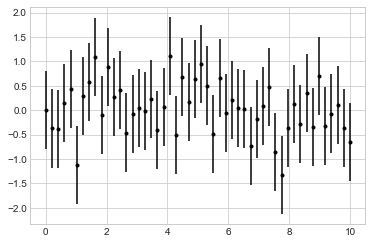

In [8]:
dy = 0.8
y = np.sin(x) * dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

In [19]:
from sklearn.gaussian_process import GaussianProcessRegressor as GP

model = lambda x: x + np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

gp = GP(corr='cubic', theta0=1e-2, thetaL=1e-4,
                    thetaU=1E-1, random_start=100)

gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], eval_MSE=True)

dyfit = 2 * np.sqrt(MSE)

plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')
plt.fill_betwata(xfit, yfit -dyfit, yfit + dyfit,
                color='gray', alpha=0.2)

plt.xlim(0, 10);

TypeError: __init__() got an unexpected keyword argument 'corr'

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

In [22]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

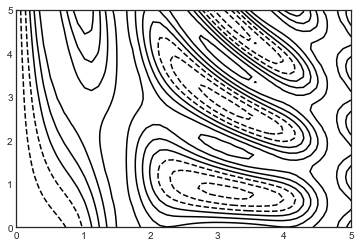

In [24]:
plt.contour(X, Y, Z, colors='black');

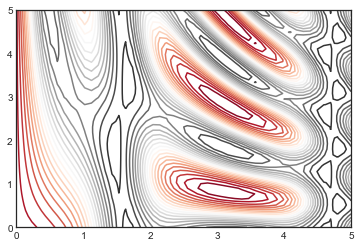

In [26]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

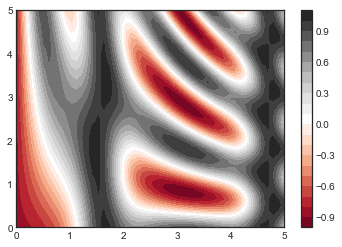

In [28]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

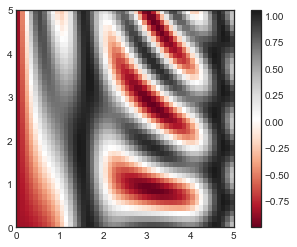

In [36]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
          cmap='RdGy')
plt.colorbar()
#plt.axis(aspect='image');

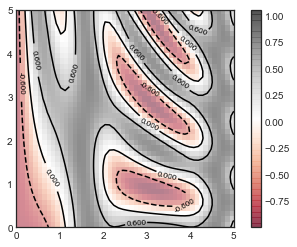

In [38]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
          cmap='RdGy', alpha=0.5)
plt.colorbar();

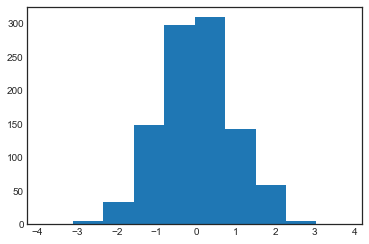

In [40]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
data = np.random.randn(1000)
plt.hist(data);

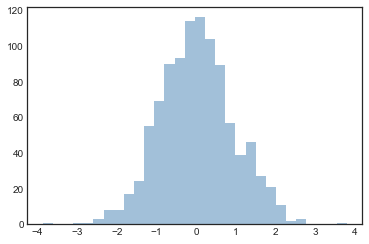

In [45]:
plt.hist(data, bins=30, alpha=0.5,
        histtype='stepfilled', color='steelblue',
        edgecolor='none');

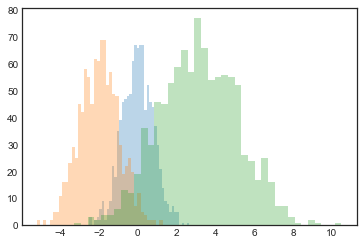

In [47]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

In [48]:
mean=[0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

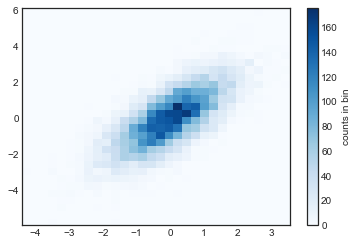

In [49]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

In [52]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

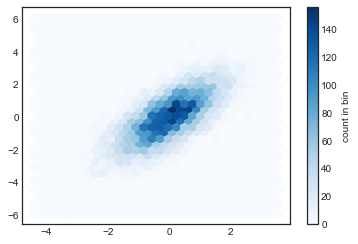

In [53]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin');

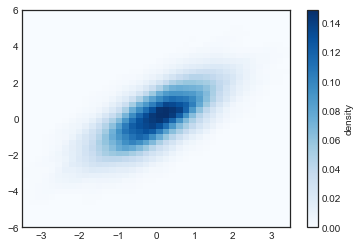

In [54]:
from scipy.stats import gaussian_kde

data = np.vstack([x, y])
kde = gaussian_kde(data)

xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)

Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

plt.imshow(Z.reshape(Xgrid.shape),
          origin='lower', aspect='auto',
          extent=[-3.5, 3.5, -6, 6],
          cmap='Blues')
cb = plt.colorbar()
cb.set_label('density');

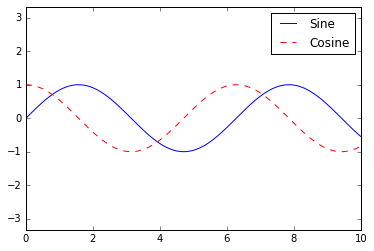

In [56]:
import matplotlib.pyplot as plt
plt.style.use('classic')

%matplotlib inline
import numpy as np

x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

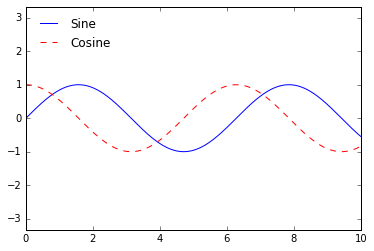

In [60]:
ax.legend(loc='upper left', frameon=False)
fig

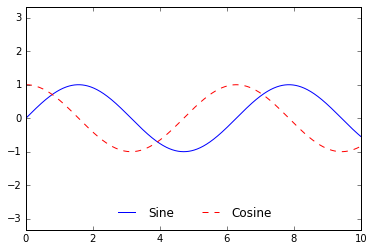

In [62]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

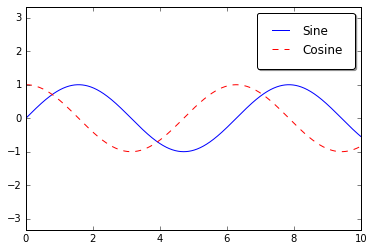

In [63]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

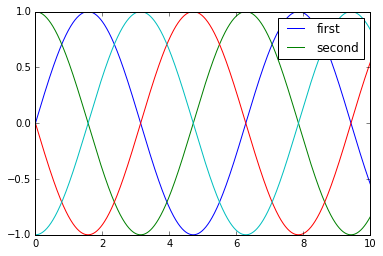

In [65]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)
plt.legend(lines[:2], ['first', 'second']);

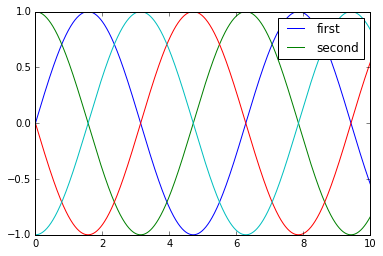

In [69]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

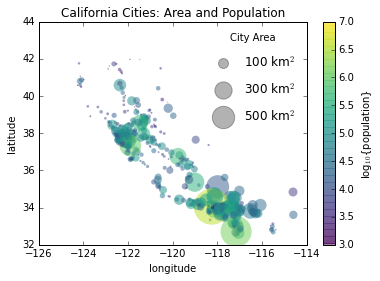

In [74]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')

lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

plt.scatter(lon, lat, label=None,
           c=np.log10(population), cmap='viridis',
           s=area, linewidth=0, alpha=0.5)

#plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}${population}')
plt.clim(3, 7);

for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
               label=str(area) + ' km$^2$')
    
plt.legend(scatterpoints=1, frameon=False,
          labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

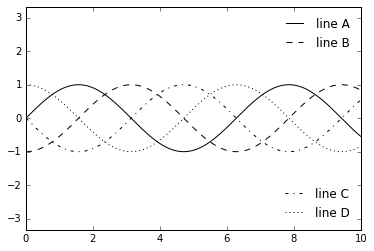

In [77]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                    styles[i], color='black')

ax.axis('equal')

ax.legend(lines[:2], ['line A', 'line B'],
         loc='upper right', frameon=False)

from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
            loc='lower right', frameon=False)

ax.add_artist(leg);

In [78]:
import matplotlib.pyplot as plt
plt.style.use('classic')

%matplotlib inline
import numpy as np


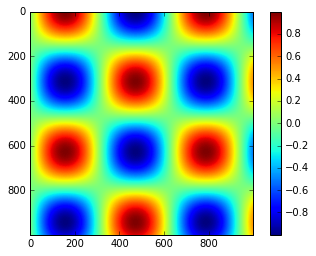

In [82]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

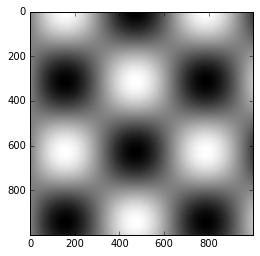

In [85]:
plt.imshow(I, cmap='gray');

In [89]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    
    return LinearSegmentedColormap.from_list(cmap.name + '_gray',
                                             colors, cmap.N)

def view_colormap(cmap):
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                          subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

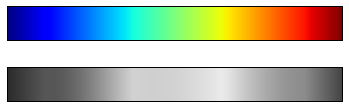

In [90]:
view_colormap('jet')

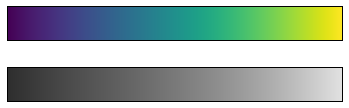

In [91]:
view_colormap('viridis')

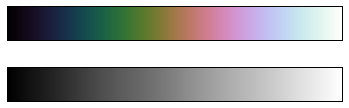

In [92]:
view_colormap('cubehelix')

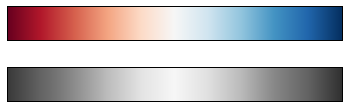

In [93]:
view_colormap('RdBu')

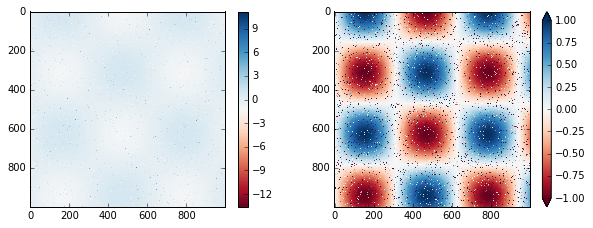

In [96]:
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

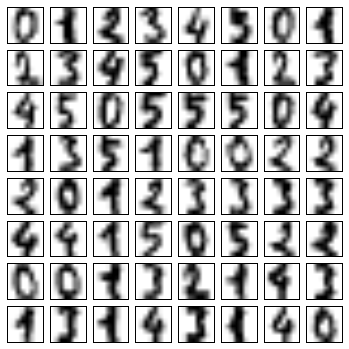

In [99]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [100]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

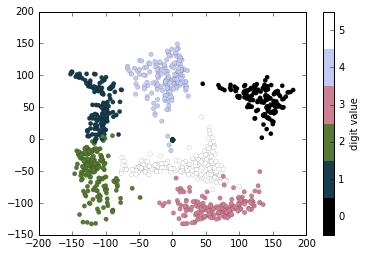

In [102]:
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
           c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))

plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)